In [ ]:
#Install & Import Required Libraries
!pip install tensorflow

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning & model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Deep learning (TensorFlow & Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load dataset
df = pd.read_csv("heart.csv")  # Ensure correct file path

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Dataset info
print(df.info())

# Describe dataset
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----------

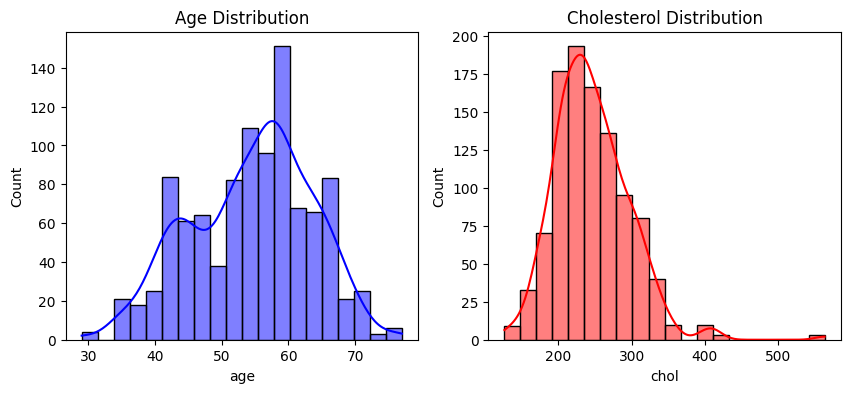

In [4]:
#Age & Cholesterol Distribution

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['chol'], bins=20, kde=True, color='red')
plt.title('Cholesterol Distribution')

plt.show()

<ipython-input-7-4ad0764a515e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette=['blue', 'red'])


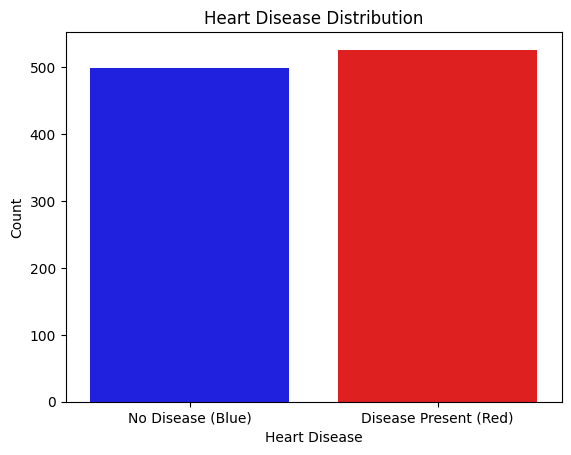

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot
sns.countplot(x="target", data=df, palette=['blue', 'red'])

# Add labels and title
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Heart Disease Distribution")

# Add a legend manually
plt.xticks([0, 1], ["No Disease (Blue)", "Disease Present (Red)"])

# Show the plot
plt.show()




<ipython-input-8-bd2c3505fff8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette='coolwarm')


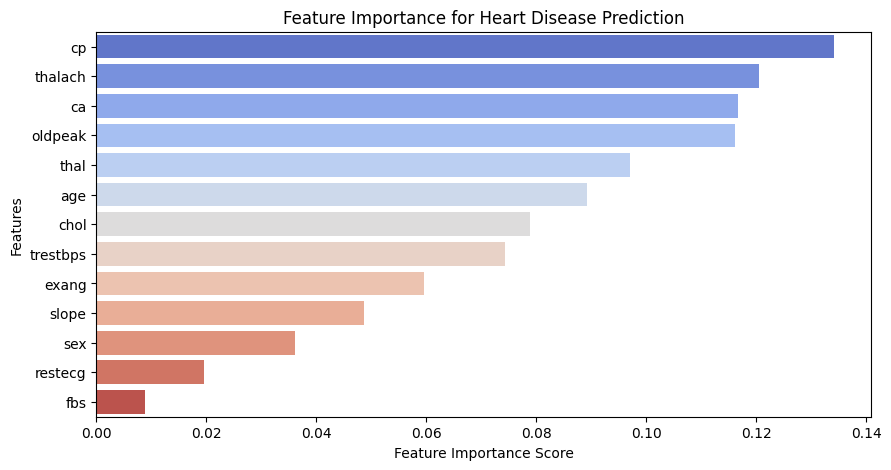

In [8]:
#Feature Importance Analysis

from sklearn.ensemble import RandomForestClassifier

# Train a simple model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df.drop(columns=['target']), df['target'])

# Get feature importance
importance = pd.Series(rf.feature_importances_, index=df.drop(columns=['target']).columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=importance.index, palette='coolwarm')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Heart Disease Prediction')
plt.show()

In [9]:
#Prepare the Data

# Split into features and target
X = df.drop(columns=['target'])
y = df['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Build & Train the ANN Model

import pandas as pd

# Create a DataFrame to compare predictions and actual values
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_labels.flatten()})
print(results.head(10))  # Show first 10 results


   Actual  Predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       0          0
5       1          1
6       0          0
7       0          0
8       1          1
9       0          0


In [13]:
#Evaluate the Model

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Accuracy: 0.84


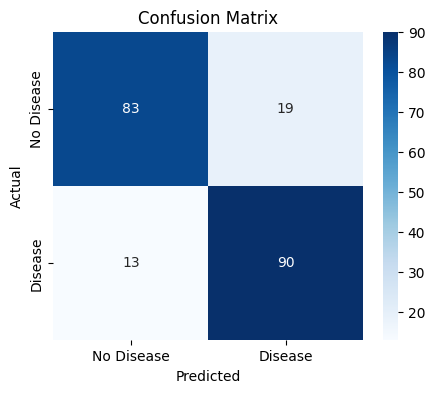

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       102
           1       0.83      0.87      0.85       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [14]:
#Confusion Matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_pred))

#I think that's make sense to Artificial Neural Network